In [18]:
import pymc
import numpy as np

# Useful plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import corner

# Import the project utils
import sys
sys.path.insert(0, '../')
import plotting_defaults
%matplotlib inline

In [3]:
# load the database and save and plot the mean value of the emat
burn_in = 1000
fn = 'input_data/prel_001.sql'
db = pymc.database.sqlite.load(fn)

emat_mean = np.mean(db.trace('emat')[burn_in:],axis=0)


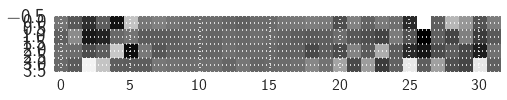

In [37]:
plt.imshow(emat_mean,interpolation='nearest')

In [39]:
-db.trace('emat')[burn_in:,0:4,5]

array([[-0.189977, -0.019979,  0.178918,  0.031038],
       [-0.189517, -0.019994,  0.179116,  0.030395],
       [-0.190565, -0.018465,  0.178717,  0.030313],
       ..., 
       [-0.191622, -0.021276,  0.177637,  0.035261],
       [-0.191647, -0.021039,  0.177403,  0.035284],
       [-0.191816, -0.020619,  0.176987,  0.035449]])

In [40]:
emat_trace = -db.trace('emat')[burn_in:,:4,5]


In [ ]:
#plot using corner

# @article{corner,
#     Author = {Daniel Foreman-Mackey},
#     Doi = {10.21105/joss.00024},
#     Title = {corner.py: Scatterplot matrices in Python},
#     Journal = {The Journal of Open Source Software},
#     Year = 2016,
#     Volume = 24,
#     Url = {http://dx.doi.org/10.5281/zenodo.45906}
# }

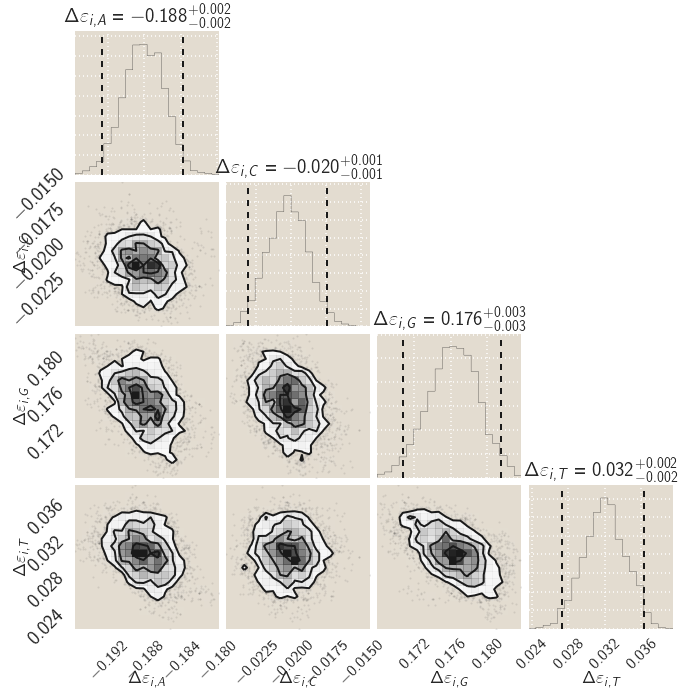

In [42]:
# Draw the corner plot
from matplotlib import rcParams
rcParams["font.size"] = 20
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['lines.linewidth'] = 2
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20
rcParams['axes.facecolor'] = '#E3DCD0'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 13
rcParams['font.family'] = 'Lucida Sans Unicode'
rcParams['grid.linestyle'] = ':'
rcParams['grid.linewidth'] = 1.5
rcParams['grid.color'] = '#ffffff'
rcParams['mathtext.fontset'] = 'stixsans'
rcParams['mathtext.sf'] = 'sans'
      
rc = {'lines.linewidth': 2,
      'axes.labelsize': 18,
      'axes.titlesize': 20,
      'axes.facecolor': '#E3DCD0',
      'xtick.labelsize': 16,
#      'xtick.labelsize': 'large',
      'ytick.labelsize': 20,
      'font.family': 'Lucida Sans Unicode',
      'grid.linestyle': ':',
      'grid.linewidth': 1.5,
      'grid.color': '#ffffff',
      'mathtext.fontset': 'stixsans',
      'mathtext.sf': 'sans'}
    
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set_context('notebook', rc=rc)

    
    

fig = corner.corner(emat_trace, plot_contours=True,
                   labels=[r'$\Delta \varepsilon_{i,A}$', r'$\Delta \varepsilon_{i,C}$',
                           r'$\Delta \varepsilon_{i,G}$', r'$\Delta \varepsilon_{i,T}$'],
                   quantiles=[0.025, 0.975], show_titles=True, title_kwargs={"fontsize": 20},
                   title_fmt=".3f")

fig.savefig("SI_MCMCinference_corner_plot.pdf", dpi=300)
